In [1]:
%matplotlib inline
import pandas as pd
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
import warnings
from helper_functions import plot_setup, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
plot_setup()
warnings.filterwarnings('ignore')

In this part, we'll look at Logistic Regression.<br />
While using Logistic Regression, we'll also explore the effects the number of features, and the relative sizes of training and tests sets have on the model performance.  
_Maybe with this dataset no need to look at relative sizes of training and test datasets, can just go with rule-of-thumb. Maybe revisit this in bias/variance discussion._

First, let's load the Titanic dataset we prepared in the previous notebook.

In [3]:
titanic = pd.read_csv('titanic_processed.csv')

In [4]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_members,family_status
0,1,1,0,29.0000,0,0,211.3375,2,0,0
1,1,1,1,0.9167,1,2,151.5500,2,3,1
2,1,0,0,2.0000,1,2,151.5500,2,3,1
3,1,0,1,30.0000,1,2,151.5500,2,3,1
4,1,0,0,25.0000,1,2,151.5500,2,3,1


_Explain X and y, feature and label vectors._

In [5]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

## Logistic Regression

Regressions are models which attempt to map the data into a function, so that when you use the model in the future to predict labels, all you need to do is input the feature vector into the learned regression function and your model returns a value. 

Regressions come in many flavors depending on what the function is. For example, a linear regression uses a linear function and a logistic regression uses a log function. You learn the coefficients of these functions during training and use the resulting function during testing.

The value a regression returns represents a probability. It is the _probability that this feature set belongs to a particular category_.

You may be wondering, then: If regressions are probabilities for one category, how do we use them when we have multiple categories for which we want to predict?

The algorithm used within scikit-learn does "one-versus-the-rest" with a regression called [multinominal Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). That means we can predict multiple classes. We do this by building a model for each class we want to predict. When we want to classify the item, we look at the probability produced by all of the models and return the class representing the highest probability.

In [6]:
model = LogisticRegression()

Let's start first with just the first two dimensions as features (sepal length and width) for simplicity. We will see if these two features alone are predictive enough for species.

In [7]:
X_sub = X[['pclass']]

Separate the data into training and test sets using a 80/20 split.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

Train the model. (Learn about `.fit()` [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit))

Figure out if there's a nicer way to deal with .to\_frame().

In [9]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predict the labels for the test set.

In [10]:
y_pred = model.predict(X_test)

When computing accuracy, there are a variety of ways to do so.  

The `accuracy_score` we're using (you can read more on it [here](http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) by default uses something called [Jaccard Similarity](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_similarity_score.html#sklearn.metrics.jaccard_similarity_score). Don't worry too much about the details, but know that accuracy will change depending on which underlying similarity metric you use. You should ensure that the similarity metric used makes sense for the type of data you have. Though for simple purposes, this default similarity metric is usually the one you want.  

Read more [here](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) about other metrics you can use to evaluate the performance of your model.  

What is the accuracy of this model? 

In [11]:
accuracy_score(y_test, y_pred)

0.65071770334928225

Confusion matrix is one of the ways we can visually show the results of a machine learning model.

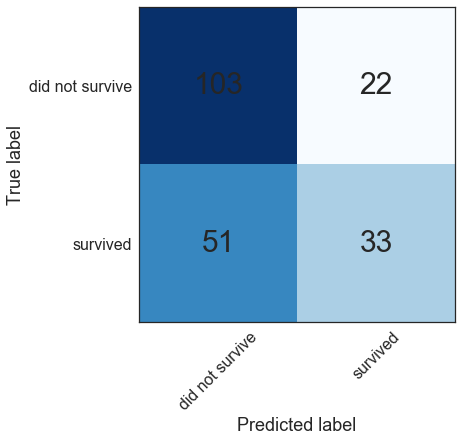

In [12]:
plot_confusion_matrix(y_test, y_pred)

Where did our model do well and where it failed? Let's plot the dataset and find out.

In [13]:
# Old plots do not work. Find a way to show where model did well and where it didn't.

#### Let's add in other features

We started with just using `sex` of a passenger as a feature. Let's see what happens if we add their passenger class, `pclass` as well.

In [14]:
X_sub = X[['sex', 'pclass']]

Separate the data into training and test sets using a 80/20 split.

In [15]:
#X_train, X_test, y_train, y_test = # TODO

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

Train the model and predict the labels for this new model.

In [17]:
# TODO - train
# TODO - predict

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

What is the accuracy of this new model?

In [19]:
# TODO

In [20]:
accuracy_score(y_test, y_pred)

0.77033492822966509

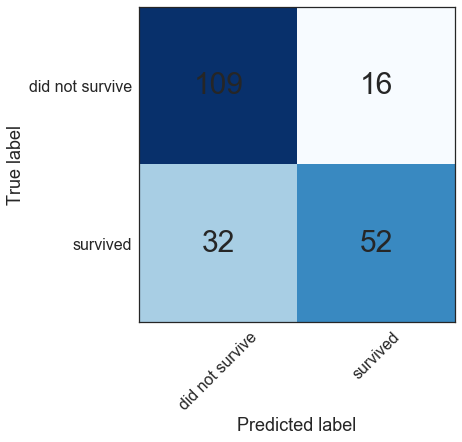

In [21]:
plot_confusion_matrix(y_test, y_pred)

Let's plot again and compare with previous models.

In [22]:
# TODO

As an exercise, pick another feature to add and see how that changes the accuracy of your model.

In [23]:
# TODO

0.775119617225


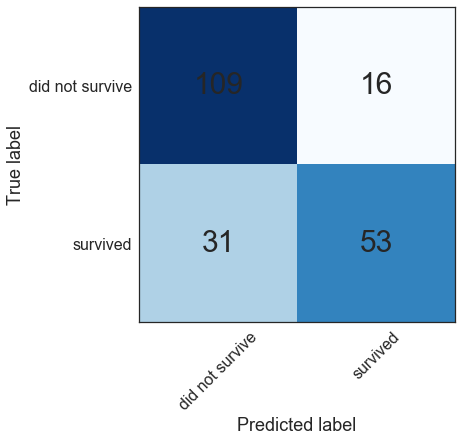

In [24]:
X_sub = X[['pclass', 'sex', 'age']]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

_Add here some text on other accuracy metrics. E.g. use the confusion matrix to explain false positives, false negatives, precision, recal, F-score._

In [26]:
#scikit-learn commands for accuracy metrics